# Timing statistics

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

In [90]:
table = pd.read_json("recontiming128-1024.json", orient="index")
table.head()

,data,timing
2021-01-28 07:42:51,"{'projections': 256, 'sizeu': 256, 'sizev': 25...","{'FullLogNorm': 13.3639, 'MorphSpotClean': 646..."
2021-01-28 07:43:14,"{'projections': 256, 'sizeu': 256, 'sizev': 25...","{'FullLogNorm': 15.4258, 'MorphSpotClean': 749..."
2021-01-28 07:43:37,"{'projections': 256, 'sizeu': 256, 'sizev': 25...","{'FullLogNorm': 14.28, 'MorphSpotClean': 770.8..."
2021-01-28 07:44:00,"{'projections': 256, 'sizeu': 256, 'sizev': 25...","{'FullLogNorm': 15.6156, 'MorphSpotClean': 834..."
2021-01-28 07:44:22,"{'projections': 256, 'sizeu': 256, 'sizev': 25...","{'FullLogNorm': 13.3923, 'MorphSpotClean': 705..."


In [106]:
table['Total time']=np.nan
table['Time/slice']=np.nan
table['size']=np.nan
table['Total GUPS']=np.nan
table['GUPS/slice']=np.nan


for ind in table.index: 
    table['Total time'][ind] = table['timing'][ind]['total'] 
    datadict = table['data'][ind] 
    sum=1
    for key in datadict :
        sum = sum * datadict[key]

    table['size'][ind]       = datadict['sizeu']  
    table['Time/slice'][ind] = table['Total time'][ind]/datadict['sizeu'] 
    table['Total GUPS'][ind] = sum/table['Total time'][ind]/1e9
    table['GUPS/slice'][ind] = table['Total GUPS'][ind]/datadict['sizez']**2
        

C:\Users\ander\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\ander\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\ander\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\

In [107]:
table.head()

,data,timing,Total time,Time/slice,size,Total GUPS,GUPS/slice
2021-01-28 07:42:51,"{'projections': 256, 'sizeu': 256, 'sizev': 25...","{'FullLogNorm': 13.3639, 'MorphSpotClean': 646...",29585.0,115.566406,256.0,9.514111,0.000145
2021-01-28 07:43:14,"{'projections': 256, 'sizeu': 256, 'sizev': 25...","{'FullLogNorm': 15.4258, 'MorphSpotClean': 749...",22849.2,89.254688,256.0,12.318811,0.000188
2021-01-28 07:43:37,"{'projections': 256, 'sizeu': 256, 'sizev': 25...","{'FullLogNorm': 14.28, 'MorphSpotClean': 770.8...",22758.3,88.899609,256.0,12.368014,0.000189
2021-01-28 07:44:00,"{'projections': 256, 'sizeu': 256, 'sizev': 25...","{'FullLogNorm': 15.6156, 'MorphSpotClean': 834...",22875.3,89.356641,256.0,12.304756,0.000188
2021-01-28 07:44:22,"{'projections': 256, 'sizeu': 256, 'sizev': 25...","{'FullLogNorm': 13.3923, 'MorphSpotClean': 705...",22650.2,88.477344,256.0,12.427042,0.000190


In [108]:
sizes = []
avgTotalTime = []
stdTotalTime = []
avgSliceTime = []
stdSliceTime = []
avgGUPS = []

scale = 1000
for s in table['size'].unique() :
    sizes.append(s)
    avgTotalTime.append(table[table['size']==s]['Total time'].mean()/scale)
    stdTotalTime.append(table[table['size']==s]['Total time'].std()/scale)
    avgSliceTime.append(table[table['size']==s]['Time/slice'].mean()/scale)
    stdSliceTime.append(table[table['size']==s]['Time/slice'].std()/scale)
    avgGUPS.append(table[table['size']==s]['Total GUPS'].mean())

data = {'size': sizes, 
        'Total time': avgTotalTime, 
        'std Total time': stdTotalTime, 
        'Time/slice': avgSliceTime, 
        'std Time/slice': stdSliceTime,
       'GUPS': avgGUPS}

timings = pd.DataFrame.from_dict(data).sort_values('size')

In [109]:
timings

,size,Total time,std Total time,Time/slice,std Time/slice,GUPS
1,128.0,7.355198,0.151263,0.057462,0.001182,0.598168
0,256.0,23.413110,2.170190,0.091457,0.008477,12.097935
2,384.0,52.600370,0.277105,0.136980,0.000722,60.955011
3,512.0,102.467200,0.478118,0.200131,0.000934,175.809915
4,768.0,292.040600,1.068126,0.380261,0.001391,702.634238
5,1024.0,645.552667,4.235750,0.630423,0.004136,1785.996360


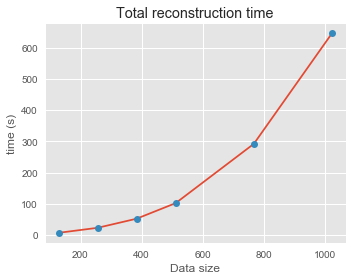

In [110]:
plt.figure(figsize=(5,4))
plt.plot(timings['size'],timings['Total time'])
plt.plot(timings['size'],timings['Total time'],'o')
plt.xlabel('Data size')
plt.ylabel('time (s)')
plt.title('Total reconstruction time');
plt.tight_layout()
plt.savefig('totaltime.svg')
plt.savefig('totaltime.png',dpi=300)

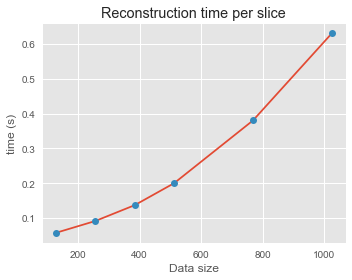

In [111]:
plt.figure(figsize=(5,4))
plt.plot(timings['size'],timings['Time/slice'])
plt.plot(timings['size'],timings['Time/slice'],'o')
plt.xlabel('Data size')
plt.ylabel('time (s)')
plt.title('Reconstruction time per slice');
plt.tight_layout()
plt.savefig('timeperslice.svg')
plt.savefig('timeperslice.png',dpi=300)

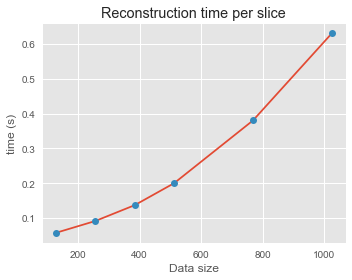

In [112]:
plt.figure(figsize=(5,4))
plt.plot(timings['size'],timings['Time/slice'])
plt.plot(timings['size'],timings['Time/slice'],'o')
plt.xlabel('Data size')
plt.ylabel('time (s)')
plt.title('Reconstruction time per slice');
plt.tight_layout()
plt.savefig('timeperslice.svg')
plt.savefig('timeperslice.png',dpi=300)

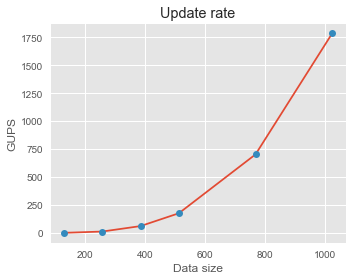

In [113]:
plt.figure(figsize=(5,4))
plt.plot(timings['size'],timings['GUPS'])
plt.plot(timings['size'],timings['GUPS'],'o')
plt.xlabel('Data size')
plt.ylabel('GUPS')
plt.title('Update rate');
plt.tight_layout()
plt.savefig('GUPS.svg')
plt.savefig('GUPS.png',dpi=300)